#### Contents

##### 01 Import libraries and data
##### 02 Run GAN
##### 03 Create confusion matrix
##### 04 Display images

#### 01 Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
#from keras.layers.core import Dense, Dropout
#from keras.utils import np_utils
from keras.utils import to_categorical
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

2024-11-19 15:24:39.605687: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import keras
import tensorflow as tf
print(f"Keras version: {keras.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Keras version: 3.6.0
TensorFlow version: 2.16.2


In [3]:
#download the weather images and put them in a directory
path = r'/Users/Owner/Documents/CareerFoundry/Machine Learning Specialization/Data Sets/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [4]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [5]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

#### 02 Run GAN

In [45]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 25, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size -1,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size -1,
)

Epoch 1/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8847 - loss: 0.0461 - val_accuracy: 0.8490 - val_loss: 0.0603
Epoch 2/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9453 - loss: 0.0267

2024-11-19 16:06:28.626509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9525 - loss: 0.0219 - val_accuracy: 0.6875 - val_loss: 0.1245
Epoch 3/25


2024-11-19 16:06:29.130820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9464 - loss: 0.0183 - val_accuracy: 0.8854 - val_loss: 0.0529
Epoch 4/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0032

2024-11-19 16:07:24.422767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.8438 - val_loss: 0.0601
Epoch 5/25


2024-11-19 16:07:24.933340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9784 - loss: 0.0111 - val_accuracy: 0.8802 - val_loss: 0.0505
Epoch 6/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9688 - loss: 0.0195

2024-11-19 16:08:47.531683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9688 - loss: 0.0189 - val_accuracy: 0.8125 - val_loss: 0.0790
Epoch 7/25


2024-11-19 16:08:48.057209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9465 - loss: 0.0220 - val_accuracy: 0.8802 - val_loss: 0.0524
Epoch 8/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8595 - loss: 0.0398   

2024-11-19 16:09:43.769958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9145 - loss: 0.0255 - val_accuracy: 0.7500 - val_loss: 0.1015
Epoch 9/25


2024-11-19 16:09:44.289425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9081 - loss: 0.0391 - val_accuracy: 0.8646 - val_loss: 0.0545
Epoch 10/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9922 - loss: 0.0046    

2024-11-19 16:10:39.930963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9850 - loss: 0.0080 - val_accuracy: 0.8438 - val_loss: 0.0673
Epoch 11/25


2024-11-19 16:10:40.436626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9605 - loss: 0.0174 - val_accuracy: 0.8229 - val_loss: 0.0722
Epoch 12/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9688 - loss: 0.0144

2024-11-19 16:11:37.063682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9688 - loss: 0.0133 - val_accuracy: 0.7812 - val_loss: 0.0996
Epoch 13/25


2024-11-19 16:11:37.951639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9320 - loss: 0.0249 - val_accuracy: 0.8698 - val_loss: 0.0536
Epoch 14/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9688 - loss: 0.0101

2024-11-19 16:12:33.411408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9688 - loss: 0.0095 - val_accuracy: 0.9062 - val_loss: 0.0400
Epoch 15/25


2024-11-19 16:12:34.016757: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9665 - loss: 0.0134 - val_accuracy: 0.8646 - val_loss: 0.0618
Epoch 16/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9297 - loss: 0.0247

2024-11-19 16:13:33.952784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9514 - loss: 0.0172 - val_accuracy: 0.8125 - val_loss: 0.0864
Epoch 17/25


2024-11-19 16:13:34.481743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9646 - loss: 0.0143 - val_accuracy: 0.8385 - val_loss: 0.0688
Epoch 18/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9766 - loss: 0.0042

2024-11-19 16:14:32.955453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9838 - loss: 0.0033 - val_accuracy: 0.8750 - val_loss: 0.0575
Epoch 19/25


2024-11-19 16:14:33.513782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9701 - loss: 0.0128 - val_accuracy: 0.8229 - val_loss: 0.0847
Epoch 20/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9375 - loss: 0.0240

2024-11-19 16:15:29.339300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9375 - loss: 0.0236 - val_accuracy: 0.8125 - val_loss: 0.0765
Epoch 21/25


2024-11-19 16:15:29.827861: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9599 - loss: 0.0191 - val_accuracy: 0.8333 - val_loss: 0.0755
Epoch 22/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9375 - loss: 0.0203

2024-11-19 16:16:25.897628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9375 - loss: 0.0216 - val_accuracy: 0.9062 - val_loss: 0.0326
Epoch 23/25


2024-11-19 16:16:26.393289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9708 - loss: 0.0115 - val_accuracy: 0.8802 - val_loss: 0.0491
Epoch 24/25
 2/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9688 - loss: 0.0157

2024-11-19 16:17:21.404623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9688 - loss: 0.0157 - val_accuracy: 0.9375 - val_loss: 0.0188
Epoch 25/25


2024-11-19 16:17:22.040894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


27/27 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9813 - loss: 0.0103 - val_accuracy: 0.8906 - val_loss: 0.0463


In [47]:
results = pd.DataFrame(model.history.history)

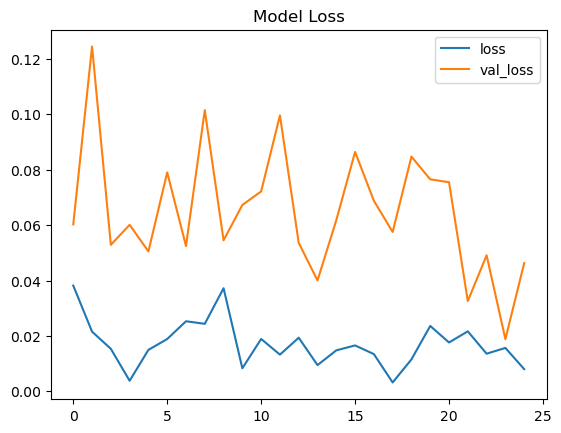

In [49]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

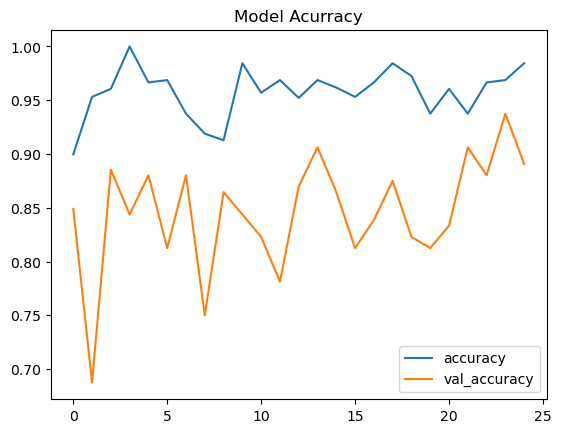

In [51]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [43]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.984375, Val_Accuracy: 0.75
Loss: 0.011564367450773716, Val_Loss: 0.10427889972925186


#### 03 Create confusion matrix

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step


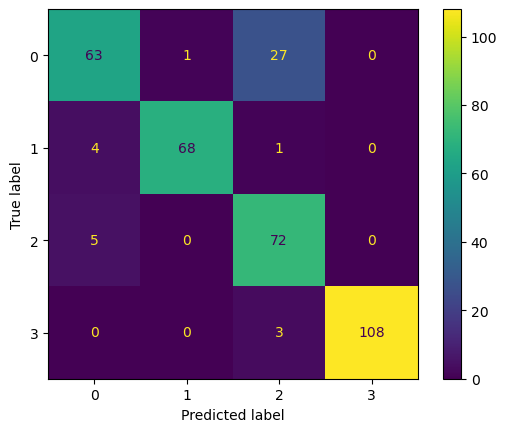

In [59]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### 04 Display images

In [61]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


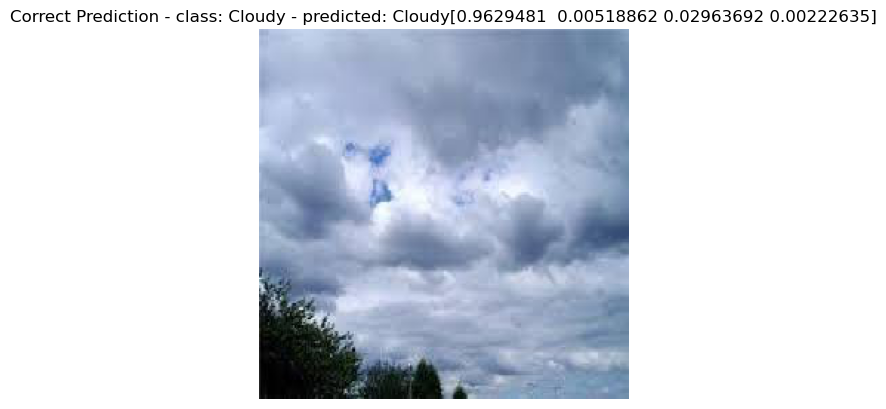

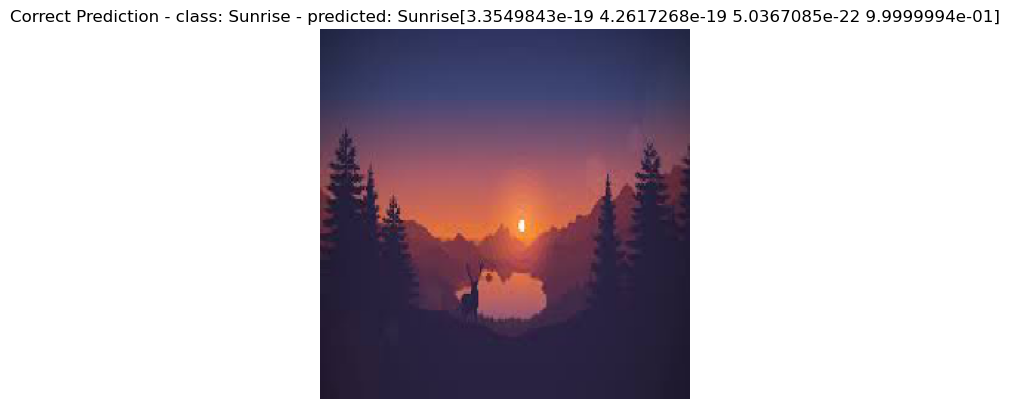

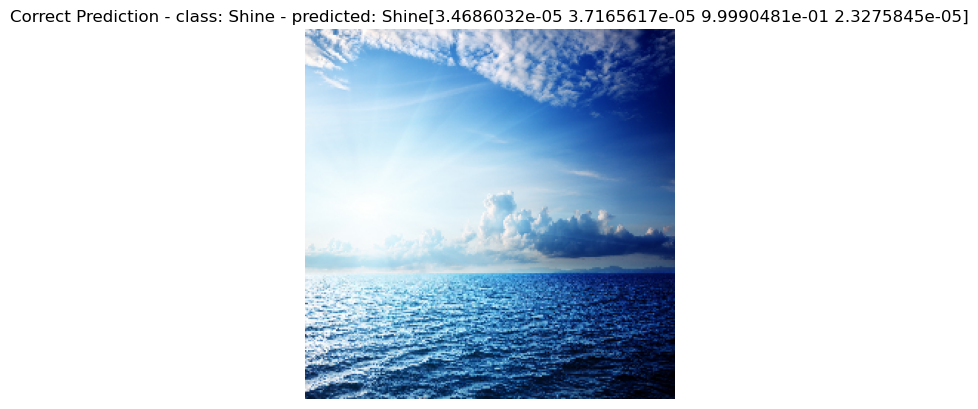

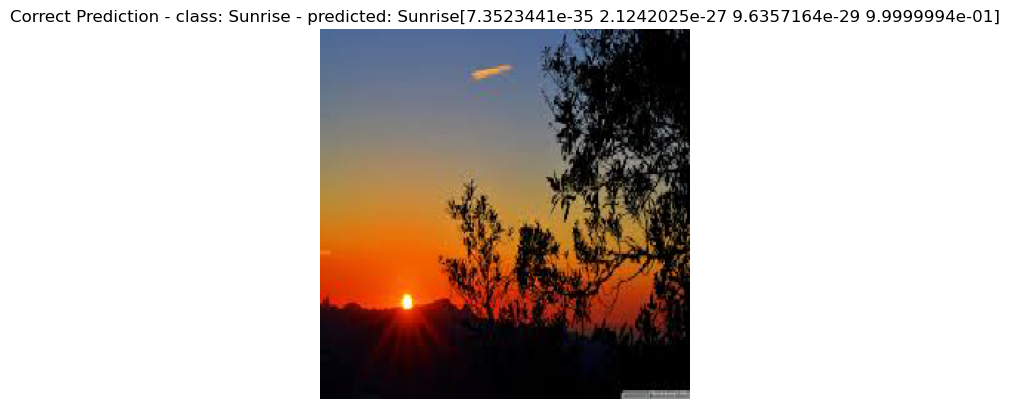

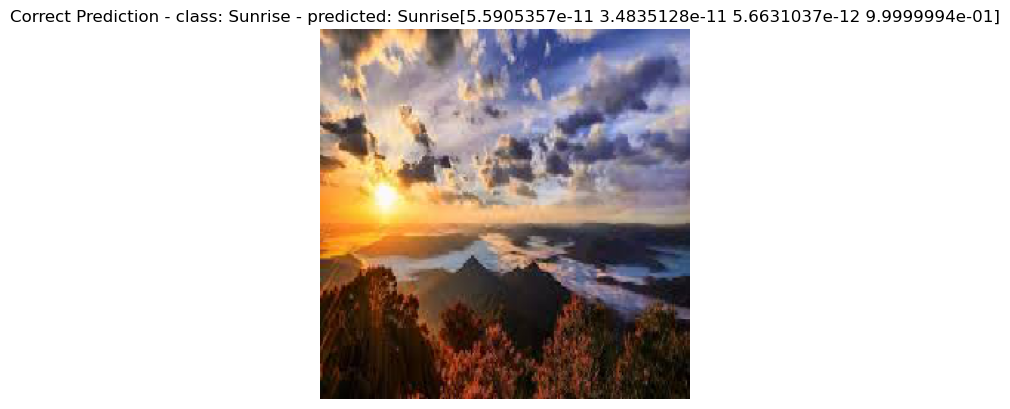

In [65]:
predict_one(model, 5) #<--you can show multiple pictures with this command. Just fill in the number you want to see.